## Objectifs

1. Méthodes de ré-échantillonnage
    - Expliquer les différentes méthodes de ré-échantillonnage
    - La validation croisée et Grid SearchCV
         - Donner l'objectif
         - Expliquer les différentes méthodes de validation croisée

2. Modélisation
    - Expliquer les différents modèles à tester sur le jeu de données
    
3. Application sur le jeu de données

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

# pas de warning
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max.columns', df.shape[1])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df = df.drop(columns=["customerID"], axis = 1)
print(f"le nombre de clients est de {df.shape[0]} ayant {df.shape[1]} caractéristiques")
df.head()

le nombre de clients est de 7043 ayant 20 caractéristiques


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print(f"Liste des variables catégorielles : ")
print("\n")
for col in df.select_dtypes('object'):
    print(f'{col:-<50} {df[col].unique()}')

Liste des variables catégorielles : 


gender-------------------------------------------- ['Female' 'Male']
Partner------------------------------------------- ['Yes' 'No']
Dependents---------------------------------------- ['No' 'Yes']
PhoneService-------------------------------------- ['No' 'Yes']
MultipleLines------------------------------------- ['No phone service' 'No' 'Yes']
InternetService----------------------------------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity------------------------------------ ['No' 'Yes' 'No internet service']
OnlineBackup-------------------------------------- ['Yes' 'No' 'No internet service']
DeviceProtection---------------------------------- ['No' 'Yes' 'No internet service']
TechSupport--------------------------------------- ['No' 'Yes' 'No internet service']
StreamingTV--------------------------------------- ['No' 'Yes' 'No internet service']
StreamingMovies----------------------------------- ['No' 'Yes' 'No internet service']
Contract---------------

In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].dtype

dtype('float64')

In [7]:
df["SeniorCitizen"].replace(to_replace=[0, 1], value=["No", "Yes"], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


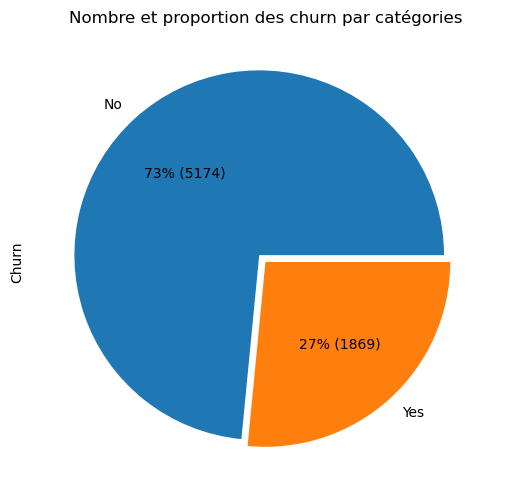

In [9]:
#calculer la proportion et le nombre de chaque catégorie
#calcul de la proportion de chaque catégorie
prop = df["Churn"].value_counts().reset_index()
prop.columns = ["Churn", "proportion"]

#graphique en secteur pour les frequences de chaque catégorie
plt.figure(figsize = (8, 6))
ax = df["Churn"].value_counts().plot(kind = "pie", explode = (0.05,0), autopct = lambda x: f'{x:.0f}% ({x/100*len(df):.0f})')

#ajustement du titre
plt.title("Nombre et proportion des churn par catégories");

In [10]:
#Nous construisons un tableau de cases avec une valeur minimale et une valeur maximale
bin = np.linspace(min(df['tenure']), max(df["tenure"]), 7)

#definition des groupe
group_name = ["New_subscrib", "two_year_subscrib", "three_year_subscrib", "four_year_subscrib", "five_year_subscrib", "six_year_subscrib"]

#creation d'une variable à partir de la fonction cut
df["seniority_company"] = pd.cut(x=df["tenure"], bins = bin, labels=group_name, include_lowest=True)
df["seniority_company"].value_counts()

New_subscrib           2186
six_year_subscrib      1407
two_year_subscrib      1024
three_year_subscrib     832
five_year_subscrib      832
four_year_subscrib      762
Name: seniority_company, dtype: int64

In [11]:
#variables liées au service de l'entreprise
df1 = df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
    'DeviceProtection', 'OnlineBackup', 'TechSupport', 'StreamingMovies',
    'StreamingTV']]

#cr'ation de la variable nombre de service souscrit par le client
numbr = []
for k in np.arange(1, df1.shape[0]+1):
    cpt = 0
    for i in np.arange(df1.shape[1]):
        if (df1.iloc[k-1:k, i].values=='Yes'):
            cpt = cpt+1
    numbr+=[cpt]
    
df = df.assign(NumberServices = numbr)

#tranformation de la variable en variable catégorielle 
df['NumberServices'] = df['NumberServices'].astype('object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             7043 non-null   object  
 1   SeniorCitizen      7043 non-null   object  
 2   Partner            7043 non-null   object  
 3   Dependents         7043 non-null   object  
 4   tenure             7043 non-null   int64   
 5   PhoneService       7043 non-null   object  
 6   MultipleLines      7043 non-null   object  
 7   InternetService    7043 non-null   object  
 8   OnlineSecurity     7043 non-null   object  
 9   OnlineBackup       7043 non-null   object  
 10  DeviceProtection   7043 non-null   object  
 11  TechSupport        7043 non-null   object  
 12  StreamingTV        7043 non-null   object  
 13  StreamingMovies    7043 non-null   object  
 14  Contract           7043 non-null   object  
 15  PaperlessBilling   7043 non-null   object  
 16  Paymen

## 1. Méthodes de ré-échantillonnage

In [13]:
y = df["Churn"]
X = df.drop(["Churn"], axis = 1).copy()

from sklearn.model_selection import train_test_split
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'{X_train.shape} et {y_train.shape}')
print("\n")
print(f"{X_test.shape} et {y_test.shape}")

(5634, 21) et (5634,)


(1409, 21) et (1409,)


### 1.1 Oversampling, Undersampling, ADASYN et Smote

#### Oversampling ou Suréchantillonnage


L'**oversampling** est une technique de rééchantillonnage utilisée pour gérer les ensembles de données déséquilibrés en augmentant le nombre d'échantillons de la classe minoritaire. Cela peut être fait en dupliquant les échantillons existants ou en générant de nouveaux échantillons synthétiques à partir des données existantes, par exemple en utilisant des méthodes telles que SMOTE (Synthetic Minority Over-sampling Technique) ou ADASYN (Adaptive Synthetic Sampling).

### Avantages

- Améliore la performance du modèle sur la classe minoritaire en augmentant la quantité d'informations disponibles pour l'apprentissage.
- Réduit le biais envers la classe majoritaire, ce qui peut améliorer la précision globale du modèle.
- Facilite la découverte de modèles significatifs dans les données en permettant aux algorithmes d'apprentissage d'explorer plus en profondeur la structure de la classe minoritaire.

### Inconvénients

- Peut entraîner un surapprentissage, car les échantillons dupliqués ou synthétiques peuvent augmenter la complexité du modèle sans apporter d'informations nouvelles.
- Augmente la taille de l'ensemble de données, ce qui peut augmenter les temps d'apprentissage et de prédiction.

#### Analyses

In [14]:
# Importer les bibliothèques nécessaires
from imblearn.over_sampling import RandomOverSampler

# Initialiser l'objet RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1, random_state=42)

# Appliquer l'oversampling sur les données d'apprentissage
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

# Créer un nouveau DataFrame avec les données oversampled
bankdata_oversampled = pd.concat([X_train_oversampled, y_train_oversampled], axis=1)

In [15]:
print(f'{X_train_oversampled.shape} et {y_train_oversampled.shape}')

(8276, 21) et (8276,)


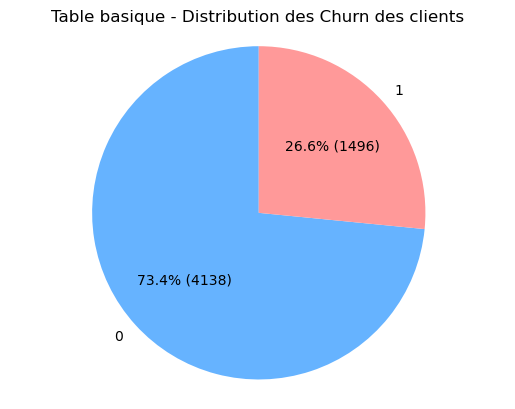

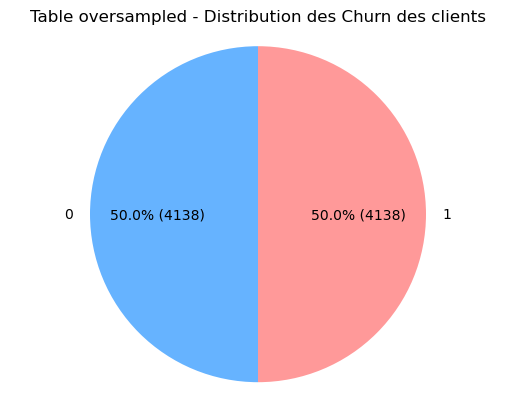

In [16]:
# Fonction pour créer un pie chart avec les proportions et les nombres
def plot_pie_chart(y, title):
    labels = ['0', '1']
    sizes = y.value_counts().values
    colors = ['#66b3ff', '#ff9999']
    
    # Modifier le format des labels pour inclure les proportions et les nombres
    def autopct_format(pct, all_values):
        absolute = int(round(pct / 100 * sum(all_values)))
        return f"{pct:.1f}% ({absolute})"

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, colors=colors, autopct=lambda pct: autopct_format(pct, sizes), startangle=90)
    ax.axis('equal')  # Pour assurer que le diagramme est bien rond
    plt.title(title)
    plt.show()

# Créer un pie chart pour la table basique
plot_pie_chart(y_train, "Table basique - Distribution des Churn des clients")

# Créer un pie chart pour la table oversampled
plot_pie_chart(y_train_oversampled, "Table oversampled - Distribution des Churn des clients")

  #### Undersampling ou sous échantillonage

L'**undersampling** est une technique de rééchantillonnage utilisée pour gérer les ensembles de données déséquilibrés en réduisant le nombre d'échantillons de la classe majoritaire. Cela peut être fait en supprimant aléatoirement des échantillons de la classe majoritaire ou en utilisant des méthodes plus sophistiquées telles que Tomek Links ou ENN (Edited Nearest Neighbors).

### Avantages

- Réduit la taille de l'ensemble de données, ce qui peut diminuer les temps d'apprentissage et de prédiction.
- Peut améliorer la performance du modèle sur la classe minoritaire en réduisant le biais envers la classe majoritaire.
- Élimine les échantillons bruyants ou redondants de la classe majoritaire, ce qui peut simplifier le modèle et éviter le surapprentissage.

### Inconvénients

- Peut entraîner une perte d'informations importantes en supprimant des échantillons de la classe majoritaire, ce qui peut nuire à la performance globale du modèle.
- Ne résout pas toujours le problème du déséquilibre des classes ; dans certains cas, l'oversampling ou d'autres techniques de rééchantillonnage peuvent être plus appropriées.
- Peut ne pas être efficace si la classe majoritaire contient de nombreuses sous-classes ou groupes distincts, car l'undersampling peut éliminer certains de ces groupes et réduire la capacité du modèle à les distinguer.

#### Analyse

In [17]:
# Importer les bibliothèques nécessaires
from imblearn.under_sampling import RandomUnderSampler

# Initialiser l'objet RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Appliquer l'undersampling sur les données d'apprentissage
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Créer un nouveau DataFrame avec les données undersampled
bankdata_undersampled = pd.concat([X_train_undersampled, y_train_undersampled], axis=1)

# Afficher la nouvelle distribution des données
print(bankdata_undersampled['Churn'].value_counts())

No     1496
Yes    1496
Name: Churn, dtype: int64


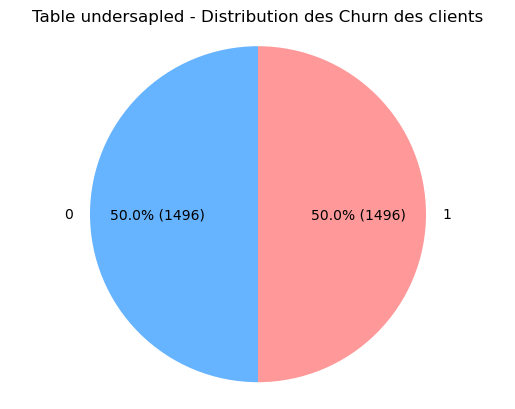

In [18]:
# Créer un pie chart pour la table oversampled
plot_pie_chart(y_train_undersampled, "Table undersapled - Distribution des Churn des clients")

### ADASYN (Adaptive Synthetic Sampling)

**ADASYN** est une technique de rééchantillonnage pour gérer les ensembles de données déséquilibrés. 

ADASYN est similaire à SMOTE, **mais génère des échantillons synthétiques en adaptant la densité des échantillons minoritaires selon leurs voisins**. ADASYN accorde plus d'importance aux échantillons de la classe minoritaire qui sont difficiles à apprendre, en créant plus d'échantillons synthétiques pour ces échantillons.

#### Avantages

- Améliore la performance du modèle sur la classe minoritaire en augmentant la quantité d'informations disponibles pour l'apprentissage.
- Réduit le biais envers la classe majoritaire, ce qui peut améliorer la précision globale du modèle.
- Génère des échantillons synthétiques adaptés aux régions où la classe minoritaire est difficile à apprendre, ce qui peut aider à éviter le surapprentissage et permettre une meilleure généralisation.
- Peut être combiné avec d'autres techniques de rééchantillonnage, telles que l'undersampling, pour créer un ensemble de données équilibré.

#### Inconvénients

- Peut créer des échantillons synthétiques qui ne représentent pas la réalité, ce qui peut entraîner un modèle moins robuste ou moins généralisable.
- Augmente la taille de l'ensemble de données, ce qui peut augmenter les temps d'apprentissage et de prédiction.


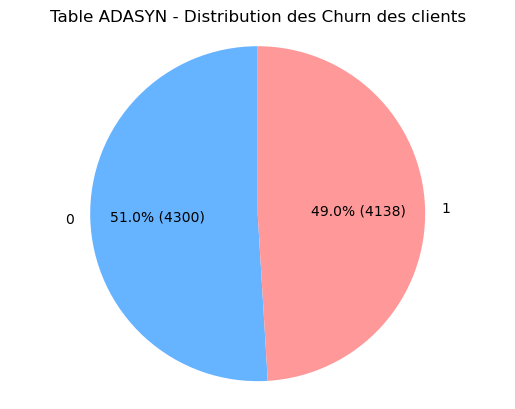

In [19]:
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

X_train_encod = OneHotEncoder().fit_transform(X_train[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',  'MultipleLines','InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'seniority_company']])
y_train_encod = LabelEncoder().fit_transform(y_train)

adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_encod, y_train_encod)
y_train_adasyn = pd.DataFrame(data=y_train_adasyn, columns=["Churn"])

# Créer un pie chart pour la table oversampled
plot_pie_chart(y_train_adasyn, "Table ADASYN - Distribution des Churn des clients")

#### Rééchantillonage SMOTE (Synthetic Minority Over-sampling Technique)

#### SMOTE (Synthetic Minority Over-sampling Technique)

**SMOTE** est une technique de rééchantillonnage spécifique pour gérer les ensembles de données déséquilibrés. 

**SMOTE génère des échantillons synthétiques de la classe minoritaire en utilisant l'interpolation entre les échantillons existants**. Pour chaque échantillon de la classe minoritaire, SMOTE sélectionne un certain nombre de ses voisins les plus proches appartenant à la même classe, puis génère de nouveaux échantillons en interpolant les attributs de l'échantillon original et de ses voisins.

### Avantages

- Améliore la performance du modèle sur la classe minoritaire en augmentant la quantité d'informations disponibles pour l'apprentissage.
- Réduit le biais envers la classe majoritaire, ce qui peut améliorer la précision globale du modèle.
- Génère des échantillons synthétiques plutôt que de dupliquer les échantillons existants, ce qui peut aider à éviter le surapprentissage et permettre une meilleure généralisation.


#### Inconvénients

- Peut créer des échantillons synthétiques qui ne représentent pas la réalité, ce qui peut entraîner un modèle moins robuste ou moins généralisable.
- Augmente la taille de l'ensemble de données, ce qui peut augmenter les temps d'apprentissage et de prédiction.

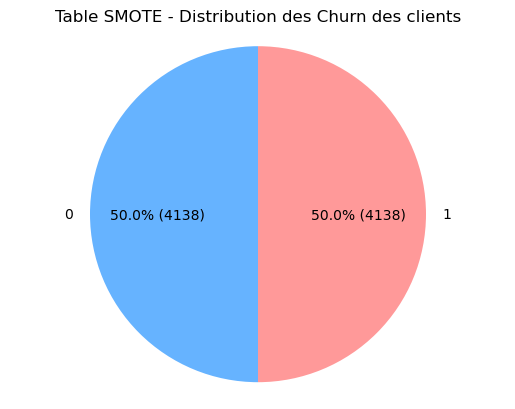

In [20]:
## Rééchantillonge SMOTE sur la base d'apprentissage
from imblearn.over_sampling import SMOTE

# Initialiser l'objet SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Appliquer le rééchantillonnage SMOTE sur les données d'apprentissage
X_train_smote, y_train_smote = smote.fit_resample(X_train_encod, y_train_encod)
y_train_smote = pd.DataFrame(data=y_train_smote, columns=["Churn"])

# Créer un nouveau DataFrame avec les données rééchantillonnées
#bankdata_smote = pd.concat([X_train_smote, y_train_smote], axis=1)

# Afficher la nouvelle distribution des données
plot_pie_chart(y_train_smote, "Table SMOTE - Distribution des Churn des clients")

### 1.2 La validation croisée

La validation croisée est une technique d'évaluation des performances du modèle d'apprentissage automatique. Elle permet de tester la capacité de généralisation des modèles sur les données inconnues. elle consiste à diviser le jeu de données en deux parties: 
- une partie pour l'entrainement du modèle
- une partie pour tester sa performance. 

Parmis les méthode de validation croisée, on peut citer :
- La méhode Hold-Out
- K-fold
- Stratified K-fold
- Leave One Out

L'objectif ici est de montrer comment mettre en place ces différentes techniques de validation croisée. 

Lorsqu'on fait du machine Learning, on découpe toujours le data set en train test et test set. Il faut noter que ce qu'on fait toujours avant de découper notre data set, on effectue un mélange pour que les échantillons tirées soient fait de manière aléatoire.
Après le mélange on découpe le jeu de données. Lorsqu'on veut valider  le modèle, on prend une autre partie du train test set appelée **validation set** (données de validation). La validation croisée consiste à faire plusieurs split et on va succéssivement entrainner et ensuite valider le modèle sur ces splits. 

In [21]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_classif, RFE
from sklearn.impute import KNNImputer 
from sklearn.model_selection import (KFold, StratifiedKFold, LeaveOneOut, 
                                     cross_val_score, validation_curve, validation_curve, 
                                     GridSearchCV)
from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import (f1_score, roc_auc_score, confusion_matrix, 
                             roc_curve, classification_report)

In [22]:
df1 = df.drop(["Churn"], axis = 1)
X = pd.get_dummies(data=df1, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
       , 'seniority_company', 'NumberServices'])
X.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
     

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f'{X_train.shape} et {y_train.shape}')
print("\n")
print(f"{X_test.shape} et {y_test.shape}")

(5282, 61) et (5282,)


(1761, 61) et (1761,)


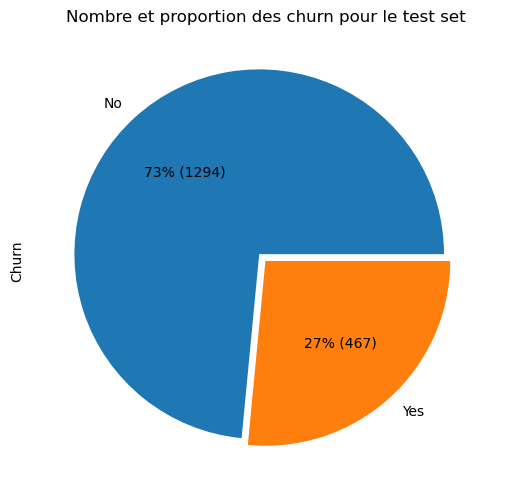

In [24]:
#calculer la proportion et le nombre de chaque catégorie
#calcul de la proportion de chaque catégorie
prop = y_test
prop.columns = ["Churn", "proportion"]

#graphique en secteur pour les frequences de chaque catégorie
plt.figure(figsize = (8, 6))
ax = y_test.value_counts().plot(kind = "pie", explode = (0.05,0), autopct = lambda x: f'{x:.0f}% ({x/100*len(y_test):.0f})')

#ajustement du titre
plt.title("Nombre et proportion des churn pour le test set");

Variables qui vont entrer dans la modélisation. Ces variables sont celles qui ont été jugées plus pertinente Par la regression de Lasso pour la modélisation 

In [25]:
numerical_features = ["tenure", "TotalCharges"]

categorical_features = ['gender_Female', 'SeniorCitizen_No',
       'SeniorCitizen_Yes', 'Partner_No', 'Dependents_No', 'Dependents_Yes',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineBackup_No',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'seniority_company_New_subscrib',
       'seniority_company_five_year_subscrib',
       'seniority_company_four_year_subscrib',
       'seniority_company_six_year_subscrib',
       'seniority_company_three_year_subscrib',
       'seniority_company_two_year_subscrib', 'NumberServices_1',
       'NumberServices_2', 'NumberServices_3', 'NumberServices_4',
       'NumberServices_5', 'NumberServices_6', 'NumberServices_8']


**Mise en place de la Pipeline**

In [26]:
def pipeline_fonction(estimator):
    
    # Définir une échelle standard pour normaliser les entrées
    scaler = MinMaxScaler()
    #definir la methode d'imputation
    impter = KNNImputer()
    #définiton de la méthode de ré-échantillonnage
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    #encodage pour les variables catégorielles
    encoder = OneHotEncoder()
    #methode de selection des variables 
    feature_select = VarianceThreshold(threshold=0.1)

    numerical_pipeline = Pipeline(steps=[("impter", KNNImputer(n_neighbors=3)), 
                                        ("scaler", MinMaxScaler()),
                                        ("feature_select", SelectKBest(score_func=f_classif, k='all'))])

    categorical_pipeline = Pipeline(steps=[("encoder", OneHotEncoder()),
                                        ("selector", VarianceThreshold(threshold=0.23))])

    preprocessor = ColumnTransformer(transformers=[('numeric_preprocessing', numerical_pipeline, numerical_features), 
                                                ("catégorical_preprocessing", categorical_pipeline, categorical_features)])

    model_pipeline = imbpipeline(steps=[('preprocessor', preprocessor), ("smote", SMOTE(sampling_strategy='auto', random_state=42)),
                                        ('pca', PCA(n_components=2)), 
                                        ('estimator', RFE(estimator, n_features_to_select = 5))])
    
    return model_pipeline

#### **2.2.1 Utilisation de la méthode Hold-Out**

la meilleur f1_score est : 0.6311389759665622
Le score moyen est de 0.6046834750244622


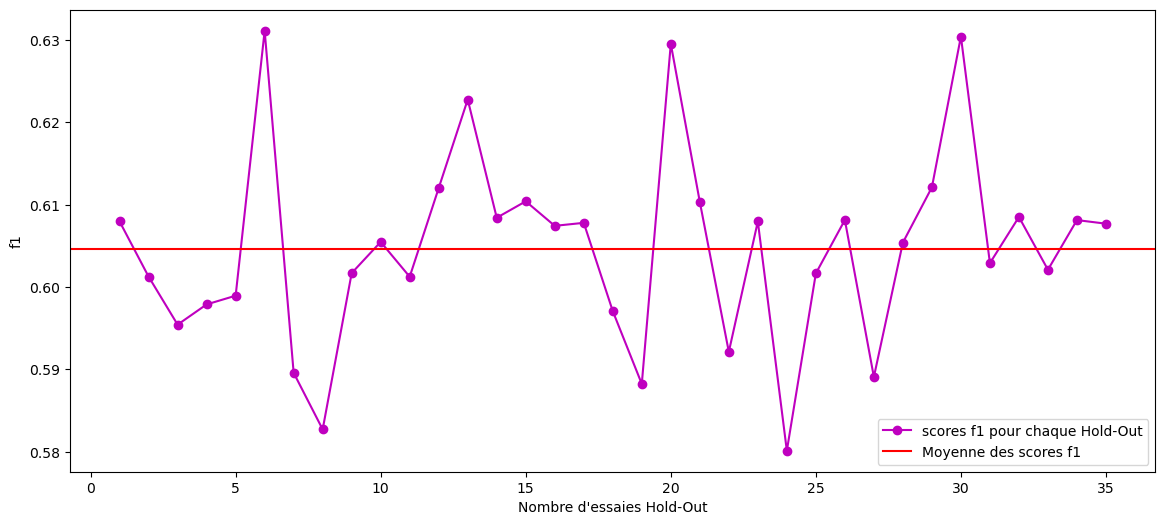

In [27]:
#on va tester plusieurs validations croisées pour valider la stabilité du modèle
nbr = 35
y = LabelEncoder().fit_transform(y)
#liste des scores de validation 
f1 = []

#repeter la validation Hold-Out plusieurs fois 
for i in range(nbr):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24+i, stratify=y)
    
    model = pipeline_fonction(LogisticRegression())
    model.fit(X_train, y_train)
    #effectuer les predictions sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    #calcul de la precision du modèle
    score = f1_score(y_test, y_pred)
    f1.append(score)
    
print(f'la meilleur f1_score est : {np.max(f1)}')
print(f'Le score moyen est de {np.mean(f1)}')     
#Création d'un graphe pour visualiser l'évolution de l'accuracy_score
plt.figure(figsize=(14, 6))
iter = np.arange(1, nbr+1)
plt.plot(iter, f1, marker = 'o', linestyle = '-', color = 'm', label = 'scores f1 pour chaque Hold-Out')
plt.axhline(y = np.mean(f1), linestyle = '-', color = 'red', label = 'Moyenne des scores f1')
plt.xlabel("Nombre d'essaies Hold-Out")
plt.ylabel("f1")
plt.legend();

On peut conclure ici que le choix de l'échantilon à un impact sur les performance du modèle car les performances du modèle fluctuent beaucoup. 

#### **2.2.2 La validation K-Fold**

Score avec K-Fold cross validation: [0.5982906  0.62381454 0.63346614 0.58521561 0.59757442]
Moyenne des scores k-fold : 0.6076722604579402


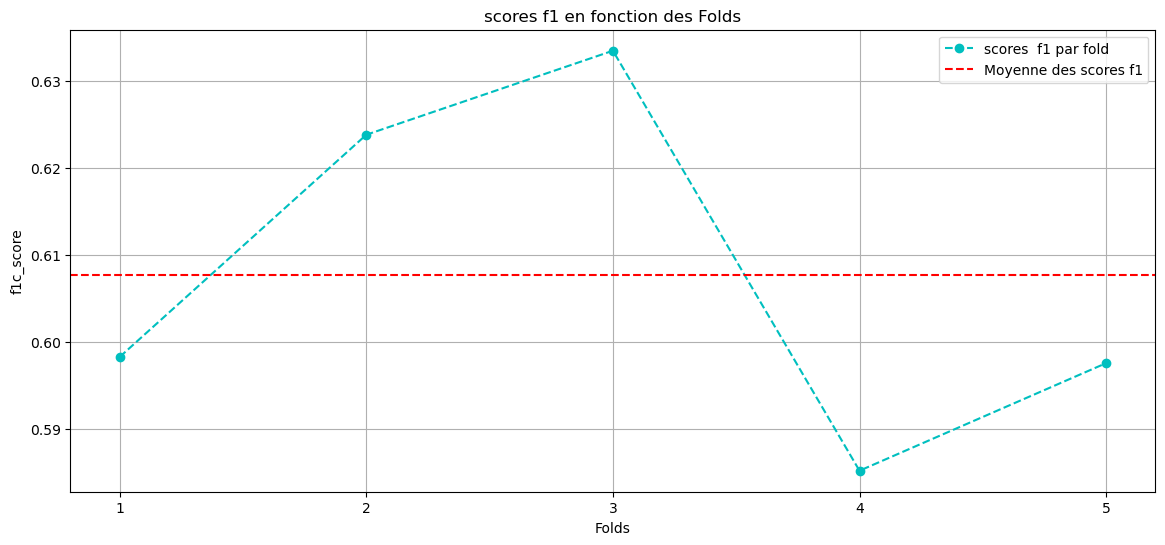

In [28]:
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
score_kfold = cross_val_score(model, X, y, cv = kfold, scoring ="f1")
print(f"Score avec K-Fold cross validation: {score_kfold}")
print(f"Moyenne des scores k-fold : {np.mean(score_kfold)}")

#création du graphique pour visualiser l'accuracy en fonction des folds
plt.figure(figsize=(14, 6))
folds = np.arange(1, len(score_kfold)+1)
plt.plot(folds, score_kfold, marker = 'o', linestyle = '--', color = 'c', label = 'scores  f1 par fold')
plt.axhline(y=np.mean(score_kfold), linestyle = '--', color = 'red', label = 'Moyenne des scores f1')

plt.xlabel('Folds')
plt.ylabel('f1c_score')
plt.title('scores f1 en fonction des Folds')
plt.legend()
plt.xticks(folds)
plt.grid();

Ici, Nous avons une certaine stabilité des Folds et la moyenne est autour de $81.83\%$

**Avantages et inconvenients de K-Fold**

Si les Fold ne sont pas choisis de manière représentatif ou s'ils sont trop petits, cela peut affecter les performances du modèle et introduire un biais de selection. 

### **2.2.3 Stratified Kfold**

Score avec stratified K-Fold Cross Validation : [0.61506276 0.57262278 0.61440678 0.6049896  0.62839248]
Moyenne des scores Stratified K-Fold : 0.6070948820037219


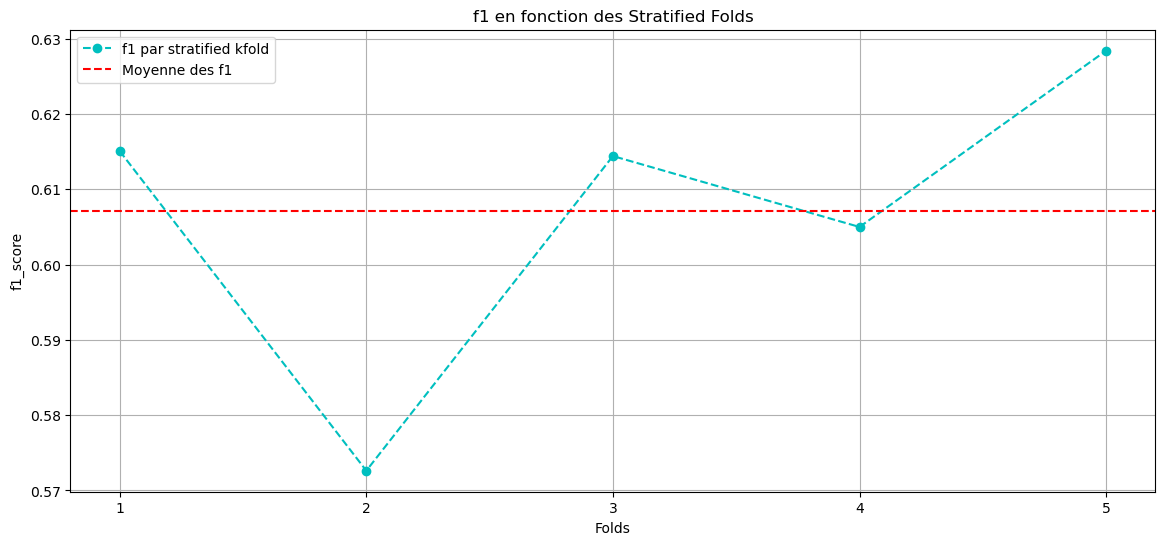

In [29]:
strat_kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
score_strat_kfold = cross_val_score(model, X, y, cv = strat_kfold, scoring='f1')
print(f"Score avec stratified K-Fold Cross Validation : {score_strat_kfold}")
print(f"Moyenne des scores Stratified K-Fold : {np.mean(score_strat_kfold)}")

#création du graphique pour visualiser l'accuracy en fonction des Stratified folds
plt.figure(figsize=(14, 6))
folds = np.arange(1, len(score_strat_kfold)+1)
plt.plot(folds, score_strat_kfold, marker = 'o', linestyle = '--', color = 'c', label = 'f1 par stratified kfold')
plt.axhline(y=np.mean(score_strat_kfold), linestyle = '--', color = 'red', label = 'Moyenne des f1')

plt.xlabel('Folds')
plt.ylabel('f1_score')
plt.title('f1 en fonction des Stratified Folds')
plt.legend()
plt.xticks(folds)
plt.grid();

On observe une certaine stabilité des Folds et la moyenne se situe autour de $81.7\%$. 

**Avantages et inconvenients du Stratified KFold**

### **2.2.4 Leave One Out**

In [30]:
'''#attention, cette methode peut être très lente en fonction de la taille du jeu de données
loo = LeaveOneOut()
score_loo = cross_val_score(model, X, y, cv = loo, scoring = "roc_auc")
print(f"le score avec leave One Out est de : {score_loo}")
print(f"La moyenne des score Leave One Out est de : {np.mean(score_loo)}")

#Création de graphique pour visualiser l'accuracy en fonction des données
points = np.arange(1, len(score_loo)+1)
plt.plot(points, score_loo, marker = 'o', linestyle = '--', color = 'm', label = 'scores roc_auc par points de données')
plt.axhline(y = np.mean(score_loo), linestyle = '--', color = 'red', label = 'Moyenne des scores roc_auc')
plt.xlabel('Points de données')
plt.ylabel('score roc_auc')
plt.title('score roc_auc en fonction des points de données Leave One Out')
plt.legend()
#affichage de certains points de données
plt.xticks(points[::10])
plt.grid();'''

'#attention, cette methode peut être très lente en fonction de la taille du jeu de données\nloo = LeaveOneOut()\nscore_loo = cross_val_score(model, X, y, cv = loo, scoring = "roc_auc")\nprint(f"le score avec leave One Out est de : {score_loo}")\nprint(f"La moyenne des score Leave One Out est de : {np.mean(score_loo)}")\n\n#Création de graphique pour visualiser l\'accuracy en fonction des données\npoints = np.arange(1, len(score_loo)+1)\nplt.plot(points, score_loo, marker = \'o\', linestyle = \'--\', color = \'m\', label = \'scores roc_auc par points de données\')\nplt.axhline(y = np.mean(score_loo), linestyle = \'--\', color = \'red\', label = \'Moyenne des scores roc_auc\')\nplt.xlabel(\'Points de données\')\nplt.ylabel(\'score roc_auc\')\nplt.title(\'score roc_auc en fonction des points de données Leave One Out\')\nplt.legend()\n#affichage de certains points de données\nplt.xticks(points[::10])\nplt.grid();'

### **2.2.5 Overfitting, Underfitting**

lorsque le modèle de machine learing a trop appris sur la base d'apprentissage et se retrouve incapable de généraliser sur les données de test, on parle d'overfitting 

#### Les causes de l'overfitting
- Elle peut être lié au jeu de données qui est peut être insuffisant pour expliquer le phénomène étudier. Lorsque nous faisons un modèle de machine learning, il faut toujours se rassurer que la base d'apprentissage soit representative de la base d'application. Cela voudrait dire que toutes les caractéristiques de la population cible, doivent se retrouver dans la base d'entrainnement du modèle. 
- La deuxième cause porte sur la complexité du modèle. On a tendance souvent à faire des modèles trop complexes, cela va caler à  la distribution de données initiales, et se retrouve incapable de généraliser sur d'autres données. Plus un modèle est complexe, et plus il apprend du bruit, c'est à dire qu'il n'apprend pas des caractéristiques importantes mais il ajoute qui n'est pas forcement pertinant pour pouvoir predire. 
- Le nombre de variable du modèle. Lorsque nous faisons un modèle de machine learning avec beaucoup de caractéristiques, cela peut conduire le modèle à surapprendre des caractéristiques de base d'apprentissage. Cela diminue donc la capacité de généralisation du modèle. 

#### Comment savoir si le modèle overfitting ou non

- La division train, test permet d'indentifier si le modèle overfit. Pour le faire, on entrainne le modèle sur la base d'apprentissage, et on test les performances sur la base test. 
- Un deuxième approche est appelée les k-fold et cela se fait de manière itérative.

#### Comment corrigé un problème d'overfitting
 - On reduit la complexité du modèle en selectionnant les variables les plus pertinantes, et on élimine les variables qui sont correlées entre elles.
 - Utiliser les modèles de regularisation telles que la regulation de lasso, Ridge. Lasso introduit un critère de pénalité sur les variables du modèle en attribuant un coefficient zero au variables les moins pertinantes dans l'estimation. 
 - mettre en place les modèles ensemblistes pour corriger le problème d'overfitting 
 - Augmenter le jeu de données.  

### **2.2.6 Le compromis Biais-Variance**

**La notion de biais**

Le biais fait référence à l'incapacité du modèle a capté les bonnes relations qui existe entre les variables. Si le modèle a un biais très important, cela veut dire qu'il y'a sous apprentissage c'est à dire que le modèle n'est pas capable de faire de bonne prédiction sous la base d'apprentissage. Ce qui veut dire que le modèle n'est pas capable de fitter sur le jeu de données d'apprentissage. Dans le cas contraire, lorsque le biais est trop faible, cela voudrait dire que le modèle le modèle surapprend c'est à dire qu'il capte un trop les relations entre les variables. 
- Underffiting = Biais important
- Overffiting = Biais faible. 

Si nous considérons $\theta$ comme paramètre d'une population, et $\hat{\theta}$ comme l'estimateur de $\theta$, alors, le biais est mesuré par la valeur $Biais(\hat{\theta}, \theta) = E[\hat{\theta}-\theta]$. Cette quantité est appelée **Erreur d'estimation**. l'erreur d'estimation par $\hat{\theta}$ d'un paramètre $\theta$ est donc la différence entre l'estimateur $\hat{\theta}$ et la vraie valeur du paramètre. Un estimateur $\hat{\theta}$ est dit sans biais si $E(\hat{\theta})=\theta$. 

L'absence de biais d'un estimateur reflète donc sa justesse. Toutefois, le critère de jsutesse seul ne suffit pas pour choisir un estimateur. Il faut aussi tenir compte de sa **precision**. Le critère plus général tenant compte de la dispersion est défini par l'erreur quadratique moyenne (MSE). 

**La notion de variance**

L'erreur quadratique moyenne (MSE) est définie par l'espérance mathématique du carré de l'erreur d'estimation : $MSE_{\theta}(\hat{\theta}) = E[(\hat{\theta}-\theta)^{2}]$. On montre facilement que : $MSE_{\theta}(\hat{\theta}) = E[(\hat{\theta}-\theta)^{2}] = var(\hat{\theta})+[E(\hat{\theta}-\theta)]^{2}$. L'erreur quadratique moyen est donc la somme de la variance et du carré du biais de l'estimateur. L'estimateur sera d'autant plus satisfaisant que son erreur quadratique moyen $MSE_{\theta}(\hat{\theta})$ est faible. En particulier, pour les estimateurs sans biais, le meilleur estimateur est celui donc la variance est minimale. On dira qu'un estimateur est éfficace, si sa variance atteint la borne de `Cramer-Rao`. La borne de Cramer-Rao correspond à l'inverse de matrice d'information de fisher $I(\theta^{*})$.  

Lorsqu'un modèle à une variance importante, cela voudrait dire que lorsqu'on entrainne le modèle sur des données d'entrainnement, on obtient de bonne performance, mais sur lorsqu'on l'entrainne sur une nouvelle base importante (base test), on aura des performance médiocre. On parle de surapprentissage. le modèle a tellement appris des données d'apprentissage qu'il n'est plus capable de généraliser sur les données tests.

Dans le cadre de la modélisation en machine learning, l'objectif est de trouver le juste milieu entre le biais et la variance. Lorsqu'on cherche à avoir un biais faible, ça veut dire que le modèle a de très bonne performance sur la base d'apprentissage, mais avec un faible pouvoir de généralisation. Ce qui entrainne une augmentation de la variance. L'objectif est donc de trouver le modèle qui pourra ajuster ce compromis. Il est donc important de mettre en place la validation croisée. 

## **3. Les Modèles d'evaluation**

En developpant un nouveau modèle de machine learning, on a tendance à tester plusieurs catégories de modèle et à la fin choisir le modèle le plus approprié en fonction de l'objectif de l'étude, en fonction de la situation. La question centrale qui revient toujours est : Comment choisir les modèles que l'on doit tester ? Sur quels critères doit on se baser pour selectionner le modèle final ? 
Lorsque l'on veut developper un modèle de machine learning, il est important de prendre en compte les 6 critères important suivant : 
- Le 1er critère qu'il faut prendre en compte avant toutes choses est de choisir le modèle que l'on comprend. Cela revient à être capable d'expliquer ce modèle, connaitre les avantages et les inconvéniants de ce modèle. Cela permet de savoir si le modèle est adapté au problème que l'on veut resoudre et connaitre exactement les limites de ce modèle. Connaitre les hypothèses et les hyperparamètres de ce modèle avant de l'implémenter. 
- Commencer toujours par le modèle le plus simple à expliquer avant d'augmenter la complexité. 
- Prendre en compte la taille de la base de données. La question a se posé ici est : Est ce que j'ai suffisamment de données pour pouvoir develoopé le modèle que j'utilise. 
- Prendre en compte la distribution des variables. En machine learning il existe deux catégories de modèle : les modèles paramétriques parce qu'il y'a des paramètres bien connu de ce modèle et on peut les optimiser et parfois, ces modèles là repose sur des hypothèses de loi. D'un autre côté, il y'a les modèles non paramétriques qui ne tiennent pas compte de distribution de lois de probabilités sur les données. 
- Prendre en compte la performance du modèle. En général, lorsqu'on teste plusieurs modèles, on retient toujours le modèle qui fournis les meilleurs performances. 
- Le dernier critère est l'interprétabilité du modèle. En général, on choisit toujours le modèle qui est explicable par rapport à notre problèmatique connaitre les règles de decisions de ce modèle. 

Dans cette partie, Nous allons discuter des différents modèles que nous allons utiliser pour resoudre le problème de `Churn` des clients dans l'entreprise. 

### 3.1 Les Arbres de decision



### 3.2 Le modèle de regression logistique

### 3.3 Les Support Vector Machine 

### 3.4 Les Random Forest 

### 3.5 XGBoost 

### 3.6 Les k-neigbors

In [31]:
#!pip install xgboost

In [32]:
#!pip install neptune-optuna
#!pip install neptune

## **4. Application au jeu de données**

### 4.1 Decision Tree

In [33]:
#les différents paramètres des arbres de decision dans la grille
pipeline_fonction(DecisionTreeClassifier()).get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'smote', 'pca', 'estimator', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__numeric_preprocessing', 'preprocessor__catégorical_preprocessing', 'preprocessor__numeric_preprocessing__memory', 'preprocessor__numeric_preprocessing__steps', 'preprocessor__numeric_preprocessing__verbose', 'preprocessor__numeric_preprocessing__impter', 'preprocessor__numeric_preprocessing__scaler', 'preprocessor__numeric_preprocessing__feature_select', 'preprocessor__numeric_preprocessing__impter__add_indicator', 'preprocessor__numeric_preprocessing__impter__copy', 'preprocessor__numeric_preprocessing__impter__metric', 'preprocessor__numeric_preprocessing__impter__missing_values', 'preprocessor__numeric_preprocessing__impter__n_neighbors', 'preprocessor__numeric_prepro

In [34]:
#Mise en place de la Grille pour la recherche des hyperparamètres

#Methode de validation croisée 
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#définition des paramètres pour la recherhce par Grille
param_grid = {'estimator__estimator__max_depth':[3, 4, 5, 7, 10, 100], 
              'estimator__estimator__criterion': ["gini", "entropy"], 
              'estimator__estimator__ccp_alpha':[0, 0.0001, 0.001, 0.01],
              'estimator__estimator__min_samples_split': [2, 3, 4, 5, 7, 8, 10],
              'pca__n_components' : list(range(1, 3 ,1))}

#recherche des hyperparamètres pour le modèle finale
grid_search = GridSearchCV(estimator=pipeline_fonction(DecisionTreeClassifier(random_state=42)),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=stratified_kfold,
                           n_jobs=-1)

#entrainement du modèle sur le train set
grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.5918162334154266
Test score: 0.6106870229007634


In [35]:
#Meilleurs hyperparamètres
grid_search.best_params_

{'estimator__estimator__ccp_alpha': 0.001,
 'estimator__estimator__criterion': 'entropy',
 'estimator__estimator__max_depth': 5,
 'estimator__estimator__min_samples_split': 2,
 'pca__n_components': 2}

In [36]:
print(f'Les meilleurs paramètres sont : {grid_search.best_params_}')
print(f'Le meilleur score est de : {grid_search.best_score_}')

Les meilleurs paramètres sont : {'estimator__estimator__ccp_alpha': 0.001, 'estimator__estimator__criterion': 'entropy', 'estimator__estimator__max_depth': 5, 'estimator__estimator__min_samples_split': 2, 'pca__n_components': 2}
Le meilleur score est de : 0.5918162334154266


In [37]:
#Mise en place du modèle avec les meilleurs hyperparamètres donner par la Grille de recherche
Decision_tree = pipeline_fonction(DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, random_state=42, criterion = 'entropy', min_samples_split=2))

Decision_tree.fit(X_train, y_train)
# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = Decision_tree.predict(X_train)
y_test_pred = Decision_tree.predict(X_test)

# Calculer les mesures de performance
train_f = f1_score(y_train, y_train_pred)
test_f = f1_score(y_test, y_test_pred)
# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({'Métrique': ['F1'],'Ensemble d\'entraînement': [train_f],'Ensemble de test': [test_f]})

# Afficher le tableau d'évaluation des performances
print(performance_table)

  Métrique  Ensemble d'entraînement  Ensemble de test
0       F1                 0.620221          0.610687


In [38]:
#import sklearn.metrics as mtc
#sorted(mtc.SCORERS.keys())

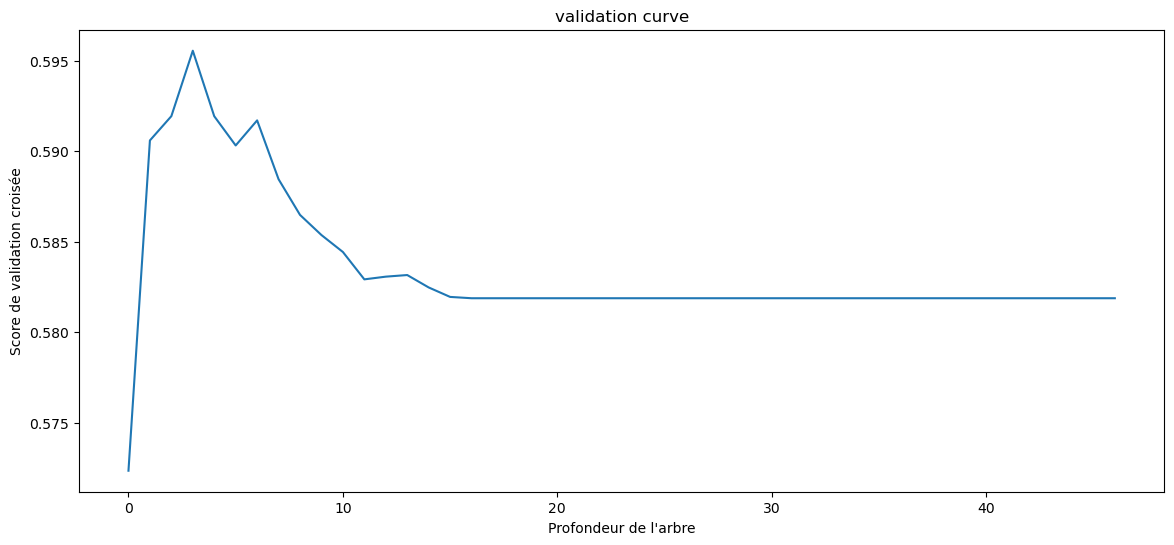

In [39]:
#Courbe de validation par rapport à la profondeur de l'arbre
val_score = []
for k in np.arange(3, 50):
    score = cross_val_score(pipeline_fonction(DecisionTreeClassifier(ccp_alpha=0.001, max_depth=k, random_state=42, criterion = 'entropy', min_samples_split=2)),
                            X_train, y_train,
                            cv=StratifiedKFold(5), scoring="f1").mean()
    val_score.append(score)

plt.figure(figsize=(14, 6))
plt.plot(val_score)
plt.xlabel("Profondeur de l'arbre")
plt.ylabel("Score de validation croisée")
plt.title("validation curve"); 

In [40]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Matrice de confusion\n\n')
    ax.set_xlabel('\n Valeurs predictes')
    ax.set_ylabel('valeurs actuelles');

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1035
           1       0.52      0.75      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409



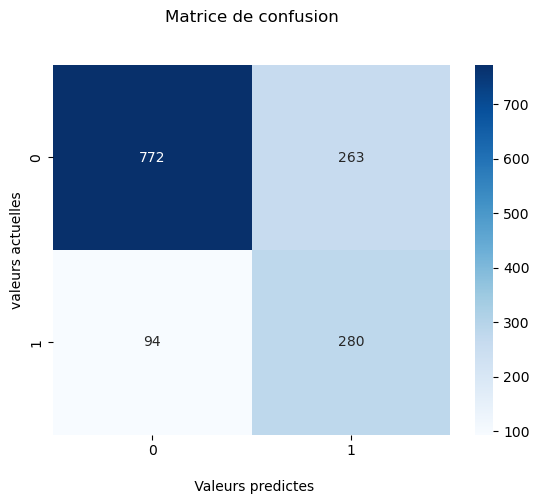

In [41]:
calculate_metrics(Decision_tree, 'Decision Tree - Pipeline', X_test, y_test)

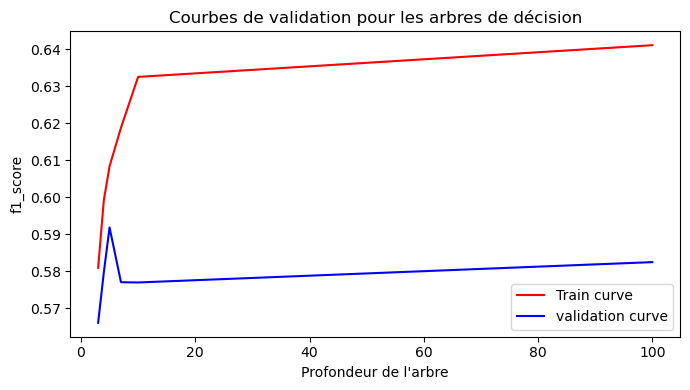

In [42]:
# courbes de validation croisée
param_range = [3, 4, 5, 7, 10, 100]
#param_range=["gini", "entropy"]

train_score, val_score = validation_curve(pipeline_fonction(DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, random_state=42, criterion = 'entropy', min_samples_split=2)),
                                          X_train, y_train,
                                          cv=stratified_kfold, 
                                          scoring="f1",
                                          n_jobs=-1,
                                          param_name="estimator__estimator__max_depth", 
                                          param_range=param_range)

#calcul de la moyenne et de l'ecart type des données d'entrainnement
train_scores_mean = np.mean(train_score, axis=1)

#calcul de la moyenne et de l'ecart type des données de tests 
test_scores_mean = np.mean(val_score, axis=1)

plt.subplots(1, figsize = (7, 4))
plt.plot(param_range, train_scores_mean, label = "Train curve", color = 'r')
plt.plot(param_range, test_scores_mean, label = "validation curve", color = 'blue')
plt.title("Courbes de validation pour les arbres de décision")

plt.legend()
plt.ylabel('f1_score')
plt.xlabel("Profondeur de l'arbre")
plt.tight_layout();

In [43]:
from sklearn.model_selection import learning_curve

[ 901 1302 1702 2103 2503 2904 3305 3705 4106 4507]


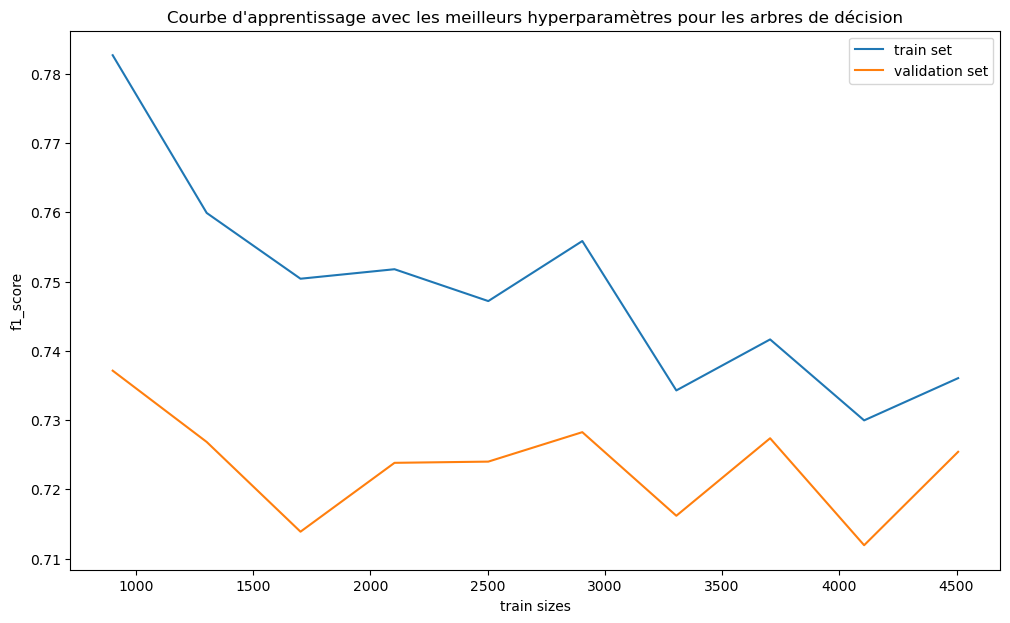

In [44]:
#Courbes d'apprentissage
n, train_score, val_score = learning_curve(pipeline_fonction(DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, random_state=42, criterion = 'entropy', min_samples_split=2)), 
                                           X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10), cv = stratified_kfold)
print(n)

plt.figure(figsize=(12, 7))
plt.plot(n, train_score.mean(axis = 1), label = 'train set')
plt.plot(n, val_score.mean(axis = 1), label = 'validation set')
plt.xlabel('train sizes')
plt.ylabel("f1_score")
plt.title("Courbe d'apprentissage avec les meilleurs hyperparamètres pour les arbres de décision")
plt.legend();

### 4.2 Logistique Regression

In [45]:
pipeline_fonction(LogisticRegression(random_state=42)).get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'smote', 'pca', 'estimator', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__numeric_preprocessing', 'preprocessor__catégorical_preprocessing', 'preprocessor__numeric_preprocessing__memory', 'preprocessor__numeric_preprocessing__steps', 'preprocessor__numeric_preprocessing__verbose', 'preprocessor__numeric_preprocessing__impter', 'preprocessor__numeric_preprocessing__scaler', 'preprocessor__numeric_preprocessing__feature_select', 'preprocessor__numeric_preprocessing__impter__add_indicator', 'preprocessor__numeric_preprocessing__impter__copy', 'preprocessor__numeric_preprocessing__impter__metric', 'preprocessor__numeric_preprocessing__impter__missing_values', 'preprocessor__numeric_preprocessing__impter__n_neighbors', 'preprocessor__numeric_prepro

In [46]:
#Methode de validation croisée 
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

#Définition des paramètres pour la recherche par grille
param_grid = {'estimator__estimator__C':np.logspace(-4, 4, 50), 
              'estimator__estimator__penalty': ['l1', 'l2']}

#recherche des meilleurs hyperparamètres 
grid_search = GridSearchCV(estimator=pipeline_fonction(LogisticRegression(random_state=42)),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=stratified_kfold,
                           n_jobs=-1)

#entrainnement sur le train set
grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.6083336560017684
Test score: 0.6072538860103627


In [47]:
#meilleurs hyperparamètres et meilleur score 
grid_search.best_params_

{'estimator__estimator__C': 0.0062505519252739694,
 'estimator__estimator__penalty': 'l2'}

In [48]:
log_reg = pipeline_fonction(LogisticRegression(C=0.0062505519252739694, penalty='l2', random_state=42))

log_reg.fit(X_train, y_train)
# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Calculer les mesures de performance
train_f = f1_score(y_train, y_train_pred)
test_f = f1_score(y_test, y_test_pred)
# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({'Métrique': [ 'F1'],'Ensemble d\'entraînement': [train_f],'Ensemble de test': [test_f]})

# Afficher le tableau d'évaluation des performances
print(performance_table)

  Métrique  Ensemble d'entraînement  Ensemble de test
0       F1                 0.607715          0.607254


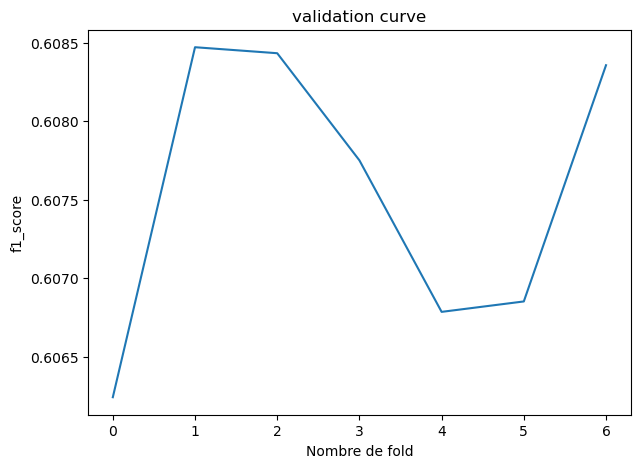

In [49]:
val_score = []
for k in np.arange(3, 10):
    score = cross_val_score(log_reg,
                            X_train, y_train,
                            cv=StratifiedKFold(k), scoring="f1").mean()
    val_score.append(score)

plt.figure(figsize=(7, 5))
plt.plot(val_score)
plt.xlabel("Nombre de fold")
plt.ylabel("f1_score")
plt.title("validation curve");

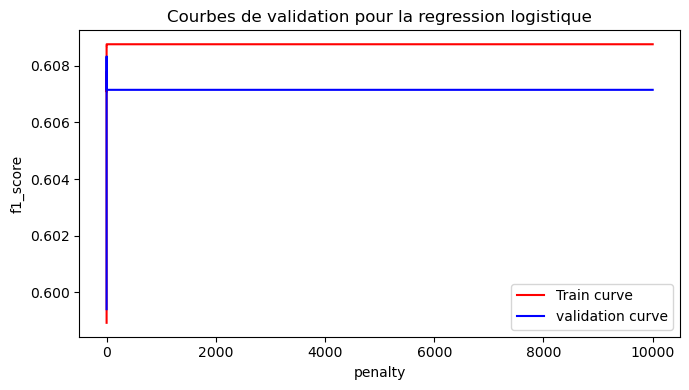

In [50]:
# courbes de validation croisée

param_range=np.logspace(-4, 4, 50)

train_score, val_score = validation_curve(log_reg,
                                          X_train, y_train,
                                          cv=stratified_kfold, 
                                          scoring="f1",
                                          n_jobs=-1,
                                          param_name="estimator__estimator__C", 
                                          param_range=param_range)

#calcul de la moyenne et de l'ecart type des données d'entrainnement
train_scores_mean = np.mean(train_score, axis=1)

#calcul de la moyenne et de l'ecart type des données de tests 
test_scores_mean = np.mean(val_score, axis=1)

plt.subplots(1, figsize = (7, 4))
plt.plot(param_range, train_scores_mean, label = "Train curve", color = 'r')
plt.plot(param_range, test_scores_mean, label = "validation curve", color = 'blue')
plt.title("Courbes de validation pour la regression logistique")
plt.legend()
plt.ylabel('f1_score')
plt.xlabel('penalty')
plt.tight_layout();

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.75      1409



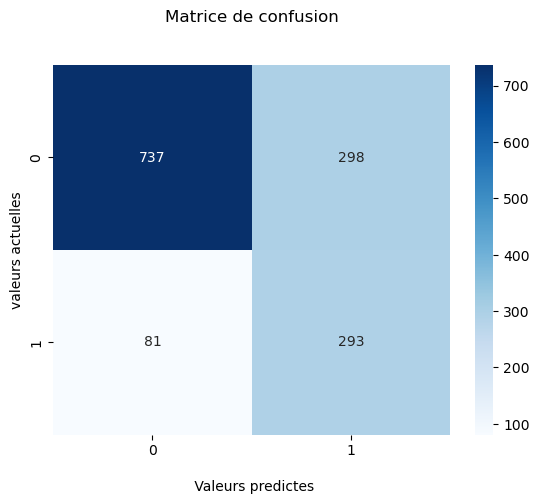

In [51]:
#matrice de confusion
calculate_metrics(log_reg, 'Regression Logistique - Pipeline', X_test, y_test)

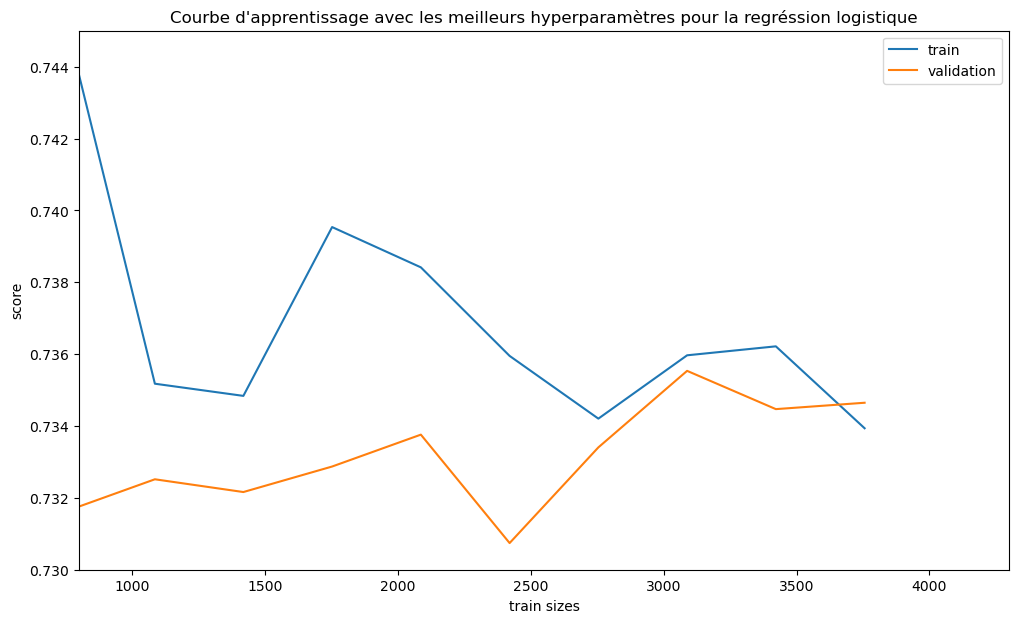

In [52]:
n, train_score, val_score = learning_curve(log_reg, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10), cv = stratified_kfold)

plt.subplots(1, figsize=(12, 7))
plt.plot(n, train_score.mean(axis = 1), label = 'train')
plt.plot(n, val_score.mean(axis = 1), label = 'validation')
plt.xlabel('train sizes')
plt.ylabel('score')
plt.title("Courbe d'apprentissage avec les meilleurs hyperparamètres pour la regréssion logistique")
plt.xlim([800, 4300])
plt.ylim([0.73, 0.745])
plt.legend();

### 4.3 Les SVM

In [53]:
from sklearn.svm import SVC
pipeline_fonction(SVC(random_state=42)).get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'smote', 'pca', 'estimator', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__numeric_preprocessing', 'preprocessor__catégorical_preprocessing', 'preprocessor__numeric_preprocessing__memory', 'preprocessor__numeric_preprocessing__steps', 'preprocessor__numeric_preprocessing__verbose', 'preprocessor__numeric_preprocessing__impter', 'preprocessor__numeric_preprocessing__scaler', 'preprocessor__numeric_preprocessing__feature_select', 'preprocessor__numeric_preprocessing__impter__add_indicator', 'preprocessor__numeric_preprocessing__impter__copy', 'preprocessor__numeric_preprocessing__impter__metric', 'preprocessor__numeric_preprocessing__impter__missing_values', 'preprocessor__numeric_preprocessing__impter__n_neighbors', 'preprocessor__numeric_prepro

In [54]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = [{'estimator__estimator__kernel': ['rbf','linear'], 
               'estimator__estimator__C': [0.001, 0.01, 0.1, 1.0, 10.0], 
               'estimator__estimator__cache_size': [400], 
               'estimator__estimator__gamma':[0.001, 0.01, 0.1, 1.0, 10.0],
               'pca__n_components':list(range(1, 3 ,1))}]


grid_search = GridSearchCV(estimator=pipeline_fonction(SVC(random_state=42)),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.6080294312851257
Test score: 0.610878661087866


In [55]:
#meilleurs hyperparamètres et meilleur score 
grid_search.best_params_

{'estimator__estimator__C': 0.001,
 'estimator__estimator__cache_size': 400,
 'estimator__estimator__gamma': 1.0,
 'estimator__estimator__kernel': 'rbf',
 'pca__n_components': 2}

In [56]:
svc = pipeline_fonction(SVC(C=0.001, cache_size=400, gamma=1.0, kernel='rbf', random_state=42))

svc.fit(X_train, y_train)
# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

# Calculer les mesures de performance
train_f = f1_score(y_train, y_train_pred)
test_f = f1_score(y_test, y_test_pred)
# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({
    'Métrique': ['F1'],
    'Ensemble d\'entraînement': [train_f],
    'Ensemble de test': [test_f]
})

# Afficher le tableau d'évaluation des performances
print(performance_table)

  Métrique  Ensemble d'entraînement  Ensemble de test
0       F1                 0.609062          0.610879


Le meilleur score est de : 0.6100742664253545


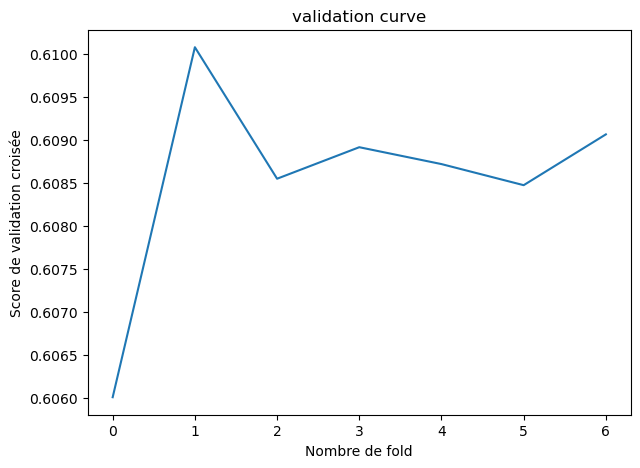

In [57]:
val_score = []
for k in np.arange(3, 10):
    score = cross_val_score(svc, X_train, y_train, cv=StratifiedKFold(k), scoring="f1").mean()
    val_score.append(score)

print(f'Le meilleur score est de : {np.max(val_score)}')
plt.figure(figsize=(7, 5))
plt.plot(val_score)
plt.xlabel("Nombre de fold")
plt.ylabel("Score de validation croisée")
plt.title("validation curve");

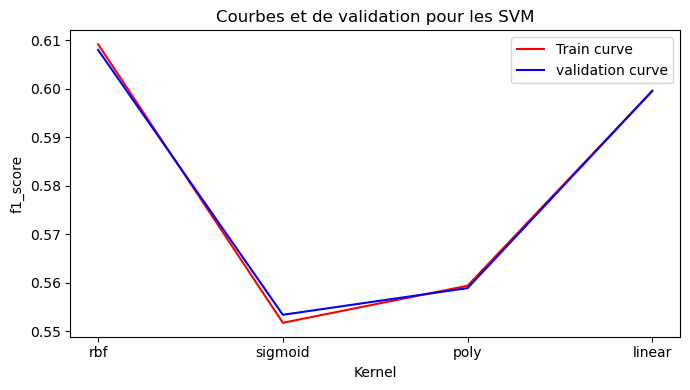

In [58]:
# courbes de validation croisée

param_range=['rbf', 'sigmoid', 'poly','linear']

train_score, val_score = validation_curve(svc,
                                          X_train, y_train,
                                          cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
                                          scoring="f1",
                                          n_jobs=-1,
                                          param_name="estimator__estimator__kernel", 
                                          param_range=param_range)

#calcul de la moyenne et de l'ecart type des données d'entrainnement
train_scores_mean = np.mean(train_score, axis=1)

#calcul de la moyenne et de l'ecart type des données de tests 
test_scores_mean = np.mean(val_score, axis=1)

plt.subplots(1, figsize = (7, 4))
plt.plot(param_range, train_scores_mean, label = "Train curve", color = 'r')
plt.plot(param_range, test_scores_mean, label = "validation curve", color = 'blue')
plt.title("Courbes et de validation pour les SVM")
plt.legend()
plt.ylabel('f1_score')
plt.xlabel('Kernel')
plt.tight_layout();

In [59]:
#matrice de confusion
#calculate_metrics(svc, 'SVM Classifier - Pipeline', X_test, y_test)

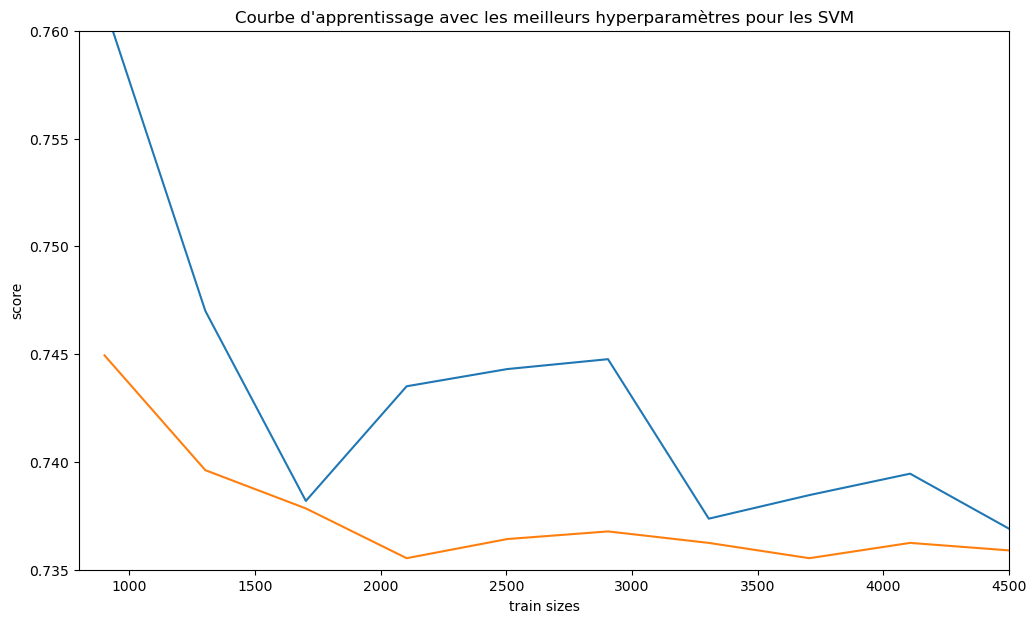

In [60]:
n, train_score, val_score = learning_curve(svc,
                                           X_train, y_train, 
                                           train_sizes = np.linspace(0.2, 1.0, 10), 
                                           cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

plt.subplots(1, figsize=(12, 7))
plt.plot(n, train_score.mean(axis = 1), label = 'train - Learning curve')
plt.plot(n, val_score.mean(axis = 1), label = 'validation- Learning curve')
plt.xlabel('train sizes')
plt.ylabel('score')
plt.title("Courbe d'apprentissage avec les meilleurs hyperparamètres pour les SVM")

plt.xlim([800, 4500])
plt.ylim([0.735, 0.76]);

### 4.4 Random Forest

In [61]:
#Recherche des paramètres 
pipeline_fonction(RandomForestClassifier(random_state=42, oob_score=True)).get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'smote', 'pca', 'estimator', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__numeric_preprocessing', 'preprocessor__catégorical_preprocessing', 'preprocessor__numeric_preprocessing__memory', 'preprocessor__numeric_preprocessing__steps', 'preprocessor__numeric_preprocessing__verbose', 'preprocessor__numeric_preprocessing__impter', 'preprocessor__numeric_preprocessing__scaler', 'preprocessor__numeric_preprocessing__feature_select', 'preprocessor__numeric_preprocessing__impter__add_indicator', 'preprocessor__numeric_preprocessing__impter__copy', 'preprocessor__numeric_preprocessing__impter__metric', 'preprocessor__numeric_preprocessing__impter__missing_values', 'preprocessor__numeric_preprocessing__impter__n_neighbors', 'preprocessor__numeric_prepro

In [62]:
# Définir les hyperparamètres à tester à l'aide de GridSearch
param_grid = {
    'estimator__estimator__n_estimators':[50, 100, 200, 500],
    'estimator__estimator__ccp_alpha':[0, 0.0001, 0.001, 0.01],
    'estimator__n_features_to_select': [5, 10,15, 20, 25],
    'estimator__estimator__max_depth': [1,2,3,4,6,7,8, 10],
    'estimator__estimator__criterion':['gini', 'entropy', 'log_loss'],
    'pca__n_components' : list(range(1, 3 ,1))
}

#recherche des hyperparamètres 
grid_search = GridSearchCV(estimator=pipeline_fonction(RandomForestClassifier(random_state=42, oob_score=True)),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.6031803330493164
Test score: 0.6086956521739131


In [63]:
#les meilleurs hyperparamètres pour le modèle
grid_search.best_params_

{'estimator__estimator__ccp_alpha': 0.0001,
 'estimator__estimator__criterion': 'gini',
 'estimator__estimator__max_depth': 6,
 'estimator__estimator__n_estimators': 50,
 'estimator__n_features_to_select': 5,
 'pca__n_components': 2}

In [64]:
# Calculer le nombre maximum de variables (max_features) à la racine carrée
#max_features = int(np.sqrt(X.shape[1]))

# Créer la forêt aléatoire avec les hyperparamètres fixés
random_forest = pipeline_fonction(RandomForestClassifier(n_estimators=50, ccp_alpha=0.0001, criterion='gini', max_depth=6, random_state=42, oob_score=True))

# Entraîner le modèle sur les données d'entraînement
random_forest.fit(X_train, y_train)

# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

# Calculer les mesures de performance
train_f = f1_score(y_train, y_train_pred)
test_f = f1_score(y_test, y_test_pred)
# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({
    'Métrique': ['F1'],
    'Ensemble d\'entraînement': [train_f],
    'Ensemble de test': [test_f]
})

# Afficher le tableau d'évaluation des performances
print(performance_table)


  Métrique  Ensemble d'entraînement  Ensemble de test
0       F1                 0.624444          0.608696


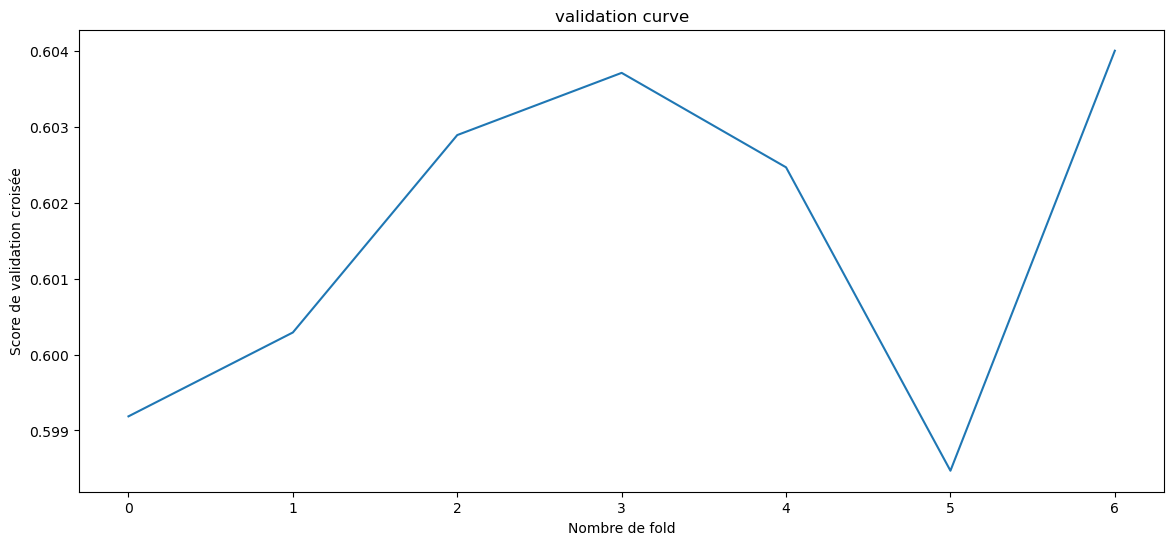

In [65]:
val_score = []
for k in np.arange(3, 10):
    score = cross_val_score(random_forest, X_train, y_train, 
                            cv=StratifiedKFold(k), scoring = 'f1').mean()
                            
    val_score.append(score)

plt.figure(figsize=(14, 6))
plt.plot(val_score)
plt.xlabel("Nombre de fold")
plt.ylabel("Score de validation croisée")
plt.title("validation curve"); 

Lors de l'utilisation d'une forêt aléatoire, certains paramètres sont essentiels à optimiser pour obtenir de bonnes performances du modèle. Voici les paramètres les plus importants à prendre en compte :

- `n_estimators` : Il s'agit du nombre d'arbres de décision dans la forêt aléatoire. Augmenter ce nombre peut améliorer les performances du modèle, mais cela entraîne également une augmentation du temps de calcul.



- `max_depth` : C'est la profondeur maximale de chaque arbre de décision. Une valeur plus élevée permet à l'arbre d'apprendre des relations plus complexes dans les données, mais elle peut également conduire à un surajustement. Il est important de trouver un équilibre pour éviter l'overfitting.



- `min_samples_split` : Ce paramètre définit le nombre minimum d'échantillons requis pour scinder un nœud. Une valeur plus élevée peut conduire à des arbres plus simples et éviter l'overfitting, mais cela peut également entraîner une sous-représentation des informations dans les données.




Il est recommandé d'utiliser des techniques d'optimisation telles que la recherche par grille (GridSearch) ou la recherche aléatoire (RandomizedSearch) pour explorer différentes combinaisons de ces paramètres et trouver ceux qui fournissent les meilleures performances pour votre problème spécifique.


              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1035
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.74      1409



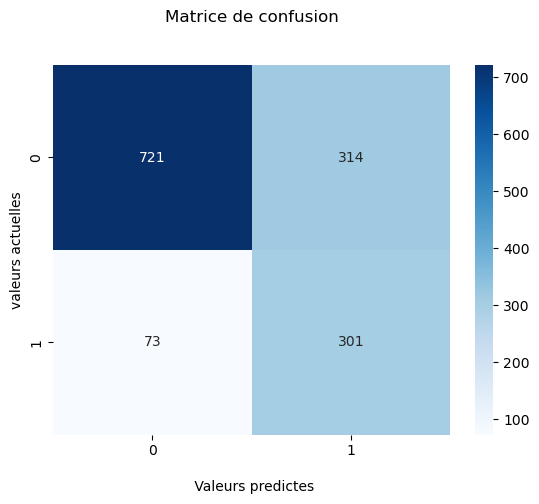

In [66]:
#matrice de confusion
calculate_metrics(random_forest, 'Random Forest - Pipeline', X_test, y_test)

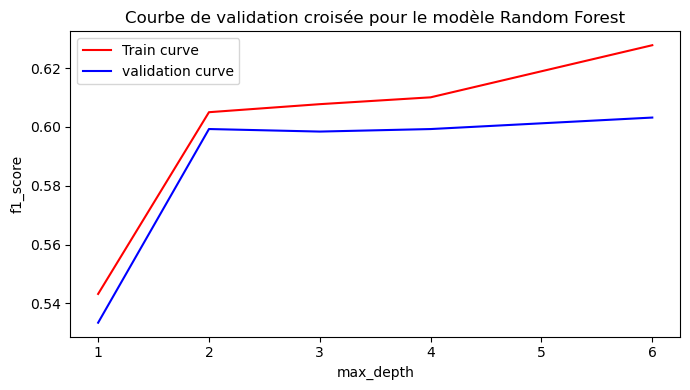

In [67]:
# courbes de validation croisée
param_range=[1,2,3,4,6]

train_score, val_score = validation_curve(random_forest, X_train, y_train,
                                          cv=stratified_kfold, 
                                          scoring="f1",
                                          n_jobs=-1,
                                          param_name="estimator__estimator__max_depth", 
                                          param_range=param_range)

#calcul de la moyenne et de l'ecart type des données d'entrainnement
train_scores_mean = np.mean(train_score, axis=1)

#calcul de la moyenne et de l'ecart type des données de tests 
test_scores_mean = np.mean(val_score, axis=1)

plt.subplots(1, figsize = (7, 4))
plt.plot(param_range, train_scores_mean, label = "Train curve", color = 'r')
plt.plot(param_range, test_scores_mean, label = "validation curve", color = 'blue')
plt.legend()
plt.ylabel('f1_score')
plt.xlabel('max_depth')
plt.title('Courbe de validation croisée pour le modèle Random Forest')
plt.tight_layout();

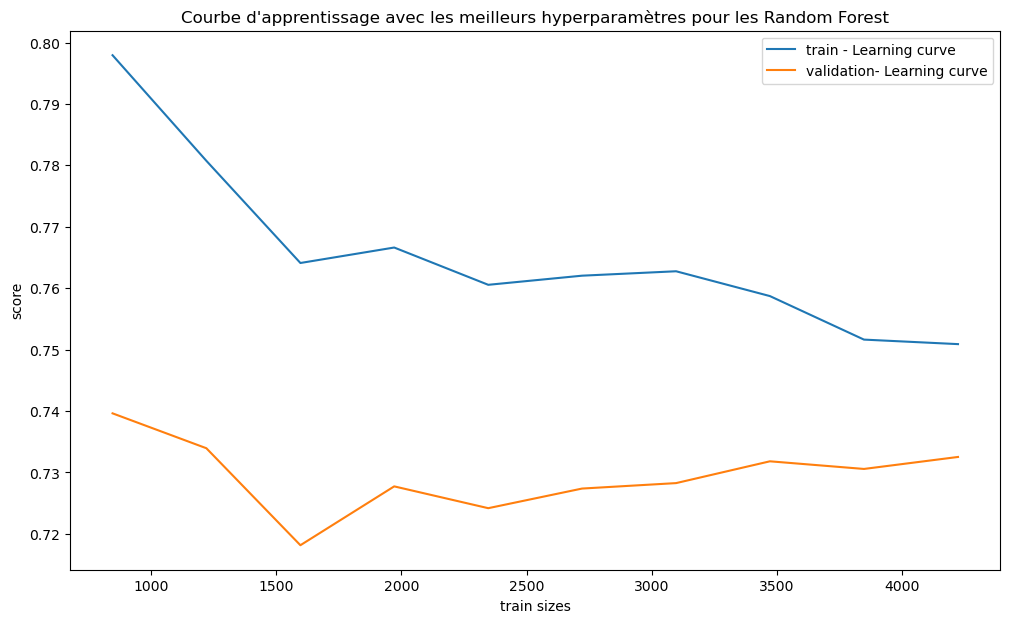

In [68]:
stratified_kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

n, train_score, val_score = learning_curve(random_forest, 
                                           X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10), cv = stratified_kfold)

plt.subplots(1, figsize=(12, 7))
plt.plot(n, train_score.mean(axis = 1), label = 'train - Learning curve')
plt.plot(n, val_score.mean(axis = 1), label = 'validation- Learning curve')
plt.xlabel('train sizes')
plt.ylabel('score')
plt.title("Courbe d'apprentissage avec les meilleurs hyperparamètres pour les Random Forest")

#plt.xlim([800, 4500])
#plt.ylim([0.72, 0.9])
plt.legend();

### 4.5 XGBoost

In [69]:
from xgboost import XGBClassifier
#les différents paramètres des arbres de decision dans la grille
pipeline_fonction(XGBClassifier(n_erandom_state=42)).get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'smote', 'pca', 'estimator', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__numeric_preprocessing', 'preprocessor__catégorical_preprocessing', 'preprocessor__numeric_preprocessing__memory', 'preprocessor__numeric_preprocessing__steps', 'preprocessor__numeric_preprocessing__verbose', 'preprocessor__numeric_preprocessing__impter', 'preprocessor__numeric_preprocessing__scaler', 'preprocessor__numeric_preprocessing__feature_select', 'preprocessor__numeric_preprocessing__impter__add_indicator', 'preprocessor__numeric_preprocessing__impter__copy', 'preprocessor__numeric_preprocessing__impter__metric', 'preprocessor__numeric_preprocessing__impter__missing_values', 'preprocessor__numeric_preprocessing__impter__n_neighbors', 'preprocessor__numeric_prepro

In [70]:
stratified_kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

# Définition des paramètres à optimiser
param_grid = {
    # max_depth est la profondeur maximale de chaque arbre. Une valeur plus élevée rendra le modèle plus complexe et pourrait entraîner un surapprentissage.
    'estimator__estimator__max_depth': [3, 4, 5, 6, 7, 8],
    # learning_rate (ou taux d'apprentissage) est le pas d'ajustement effectué à chaque étape de l'optimisation. Une valeur plus faible rendra l'apprentissage plus lent.
    'estimator__estimator__learning_rate': [0.001, 0.01, 0.1, 0.2],
    # n_estimators est le nombre d'arbres à construire.
    'estimator__estimator__n_estimators': [10, 15, 20, 30, 100, 200, 300],
    'pca__n_components': list(range(1, 3 ,1))      
}

grid_search = GridSearchCV(estimator=pipeline_fonction(XGBClassifier(random_state=42)),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.6004889869232214
Test score: 0.6034658511722731


In [71]:
#meilleurs hyperparamètres et meilleur score 
grid_search.best_params_

{'estimator__estimator__learning_rate': 0.1,
 'estimator__estimator__max_depth': 3,
 'estimator__estimator__n_estimators': 15,
 'pca__n_components': 2}

In [72]:
xgboost = pipeline_fonction(XGBClassifier(n_estimators=15, learning_rate=0.1, max_depth=3, random_state=42))

# Entraîner le modèle sur les données d'entraînement
xgboost.fit(X_train, y_train)

# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = xgboost.predict(X_train)
y_test_pred = xgboost.predict(X_test)

# Calculer les mesures de performance
train_f = f1_score(y_train, y_train_pred)
test_f = f1_score(y_test, y_test_pred)
# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({'Métrique': ['F1'],'Ensemble d\'entraînement': [train_f],'Ensemble de test': [test_f]})

# Afficher le tableau d'évaluation des performances
print(performance_table)

  Métrique  Ensemble d'entraînement  Ensemble de test
0       F1                 0.608314          0.603466


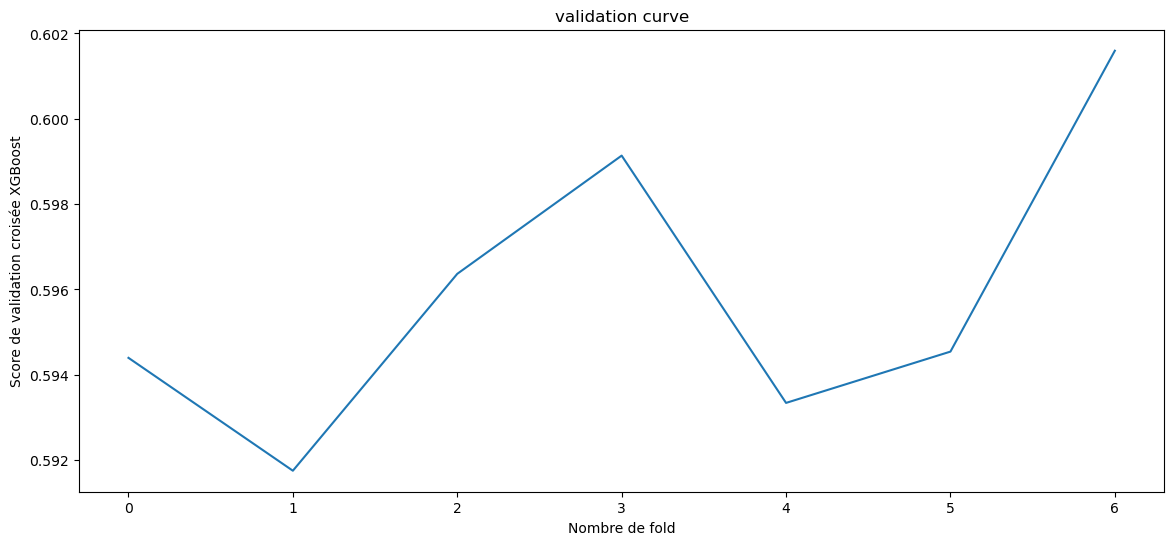

In [73]:
val_score = []
for k in np.arange(3, 10):
    score = cross_val_score(xgboost, X_train, y_train, 
                            cv=StratifiedKFold(k), scoring = 'f1').mean()
                            
    val_score.append(score)

plt.figure(figsize=(14, 6))
plt.plot(val_score)
plt.xlabel("Nombre de fold")
plt.ylabel("Score de validation croisée XGBoost")
plt.title("validation curve"); 

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1035
           1       0.49      0.79      0.60       374

    accuracy                           0.72      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.72      0.74      1409



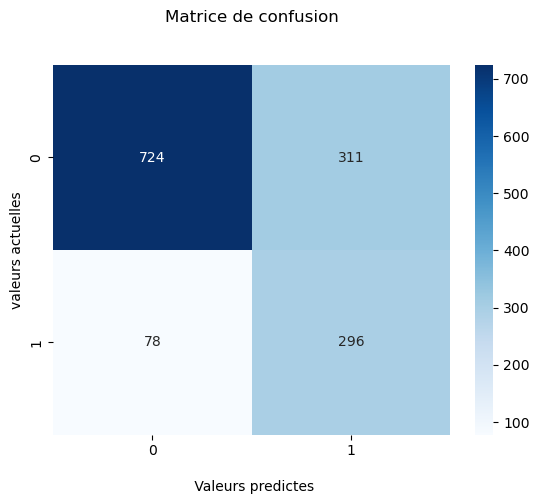

In [74]:
#matrice de confusion
calculate_metrics(xgboost, 'XGBoost - Pipeline', X_test, y_test)

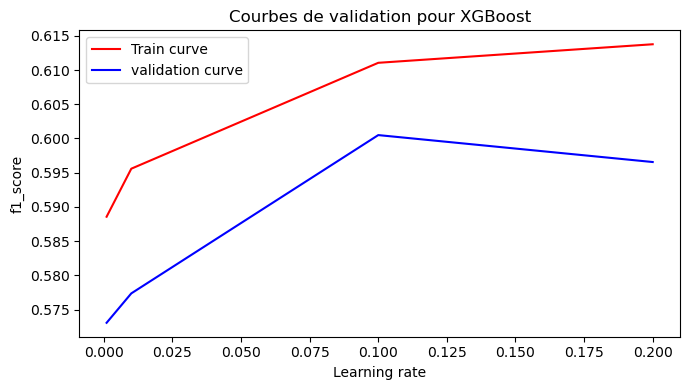

In [75]:
# courbes de validation croisée
param_range=[0.001, 0.01, 0.1, 0.2]

train_score, val_score = validation_curve(xgboost, X_train, y_train,
                                          cv=stratified_kfold, 
                                          scoring="f1",
                                          n_jobs=-1,
                                          param_name="estimator__estimator__learning_rate", 
                                          param_range=param_range)

#calcul de la moyenne et de l'ecart type des données d'entrainnement
train_scores_mean = np.mean(train_score, axis=1)

#calcul de la moyenne et de l'ecart type des données de tests 
test_scores_mean = np.mean(val_score, axis=1)

plt.subplots(1, figsize = (7, 4))
plt.plot(param_range, train_scores_mean, label = "Train curve", color = 'r')
plt.plot(param_range, test_scores_mean, label = "validation curve", color = 'blue')
plt.title("Courbes de validation pour XGBoost")
plt.legend()
plt.ylabel('f1_score')
plt.xlabel('Learning rate')
plt.tight_layout();

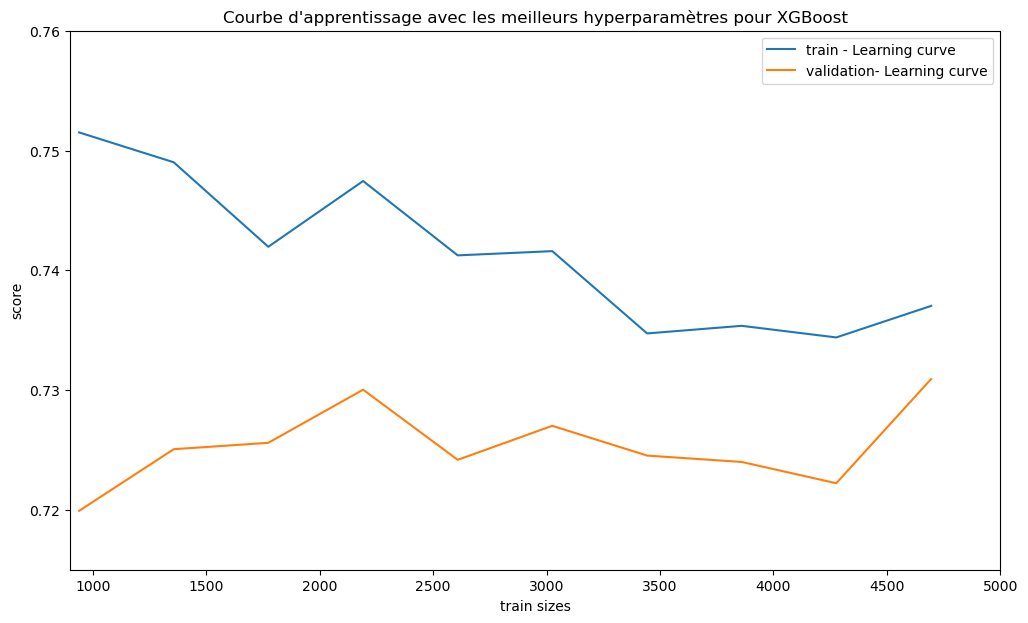

In [76]:
n, train_score, val_score = learning_curve(xgboost, 
                                           X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10), cv = stratified_kfold)

plt.subplots(1, figsize=(12, 7))
plt.plot(n, train_score.mean(axis = 1), label = 'train - Learning curve')
plt.plot(n, val_score.mean(axis = 1), label = 'validation- Learning curve')
plt.xlabel('train sizes')
plt.ylabel('score')
plt.title("Courbe d'apprentissage avec les meilleurs hyperparamètres pour XGBoost")

plt.xlim([900, 5000])
plt.ylim([0.715, 0.76])
plt.legend();

### 4.6 KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

pipeline_fonction(KNeighborsClassifier(n_neighbors=k)).get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'smote', 'pca', 'estimator', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__numeric_preprocessing', 'preprocessor__catégorical_preprocessing', 'preprocessor__numeric_preprocessing__memory', 'preprocessor__numeric_preprocessing__steps', 'preprocessor__numeric_preprocessing__verbose', 'preprocessor__numeric_preprocessing__impter', 'preprocessor__numeric_preprocessing__scaler', 'preprocessor__numeric_preprocessing__feature_select', 'preprocessor__numeric_preprocessing__impter__add_indicator', 'preprocessor__numeric_preprocessing__impter__copy', 'preprocessor__numeric_preprocessing__impter__metric', 'preprocessor__numeric_preprocessing__impter__missing_values', 'preprocessor__numeric_preprocessing__impter__n_neighbors', 'preprocessor__numeric_prepro

In [81]:
# Définition des paramètres à optimiser
param_grid = {
     'estimator__estimator__weights' : ['uniform', 'distance'],
     'estimator__estimator__n_neighbors': list(range(2, 200, 1)),
     'estimator__estimator__metric':['manhattan', 'minkowski', 'euclidean', 'cosine'], 
     'pca__n_components': list(range(1, 3 ,1))
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

ValueError: Invalid parameter estimator for estimator KNeighborsClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
grid_search.best_params_, grid_search.best_score_

In [85]:
neigbors = pipeline_fonction(KNeighborsClassifier(metric='manhattan', n_neighbors=40, weights='uniform'))

# Entraîner le modèle sur les données d'entraînement
neigbors.fit(X_train, y_train)

# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = neigbors.predict(X_train)
y_test_pred = neigbors.predict(X_test)

# Calculer les mesures de performance
train_f = f1_score(y_train, y_train_pred)
test_f = f1_score(y_test, y_test_pred)
# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({
    'Métrique': ['F1'],
    'Ensemble d\'entraînement': [train_f],
    'Ensemble de test': [test_f]
})

# Afficher le tableau d'évaluation des performances
print(performance_table)

  Métrique  Ensemble d'entraînement  Ensemble de test
0       F1                 0.615672           0.60815


le meilleur nombre de voisin est 40


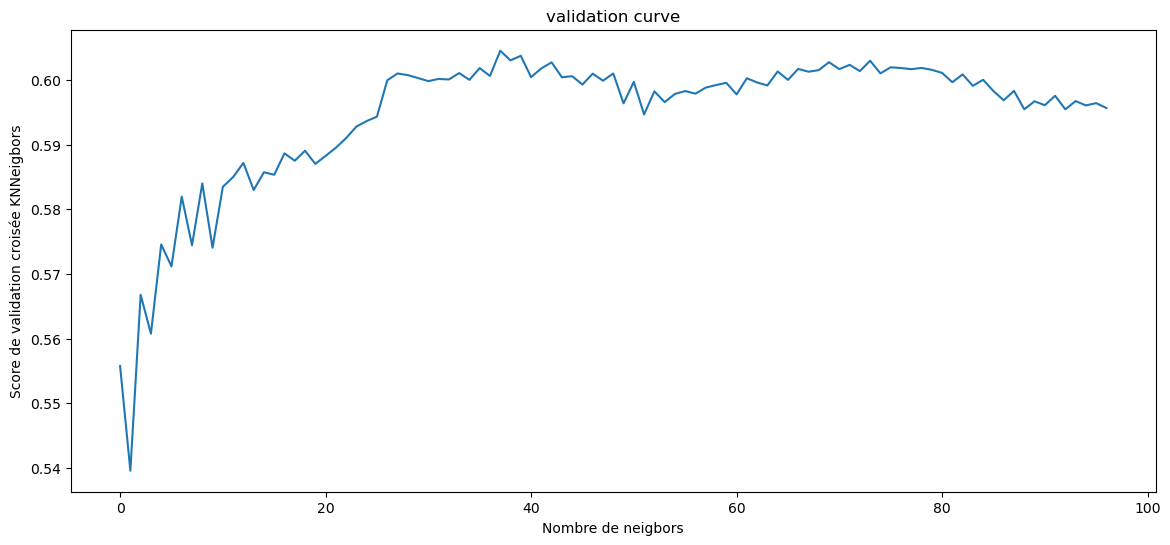

In [86]:
val_score = []
k_neigbors = 3
best_score = 0

for k in np.arange(k_neigbors, 100):
    score = cross_val_score(pipeline_fonction(KNeighborsClassifier(n_neighbors=k)), X_train, y_train, 
                            cv=StratifiedKFold(5), scoring = 'f1').mean()
                            
    val_score.append(score)
    if best_score < score:
        k_neigbors = k
        best_score = score 

print(f'le meilleur nombre de voisin est {k_neigbors}')
plt.figure(figsize=(14, 6))
plt.plot(val_score)
plt.xlabel("Nombre de neigbors")
plt.ylabel("Score de validation croisée KNNeigbors")
plt.title("validation curve"); 

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.75      1409



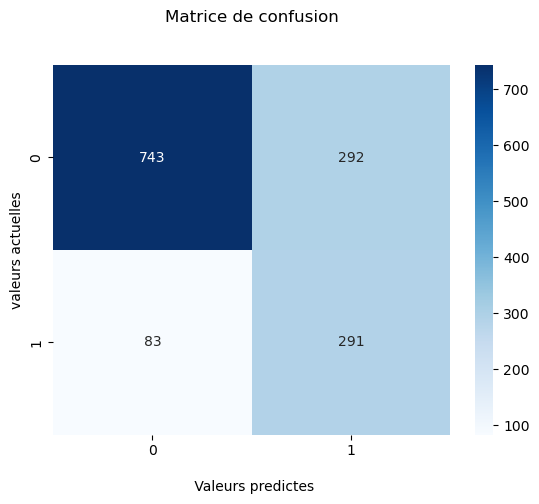

In [87]:
#matrice de confusion
calculate_metrics(neigbors, 'KNNeigbors Classifier - Pipeline', X_test, y_test)

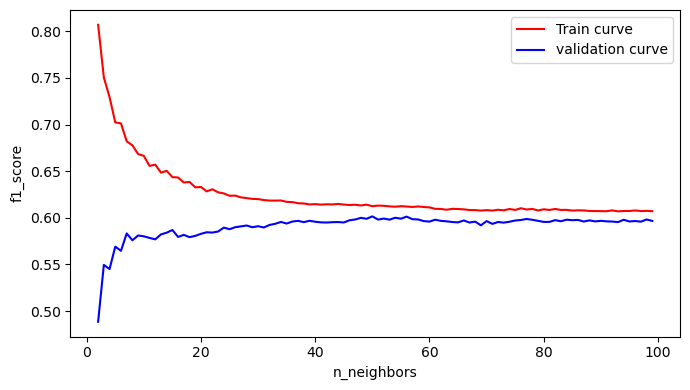

In [88]:
# courbes de validation croisée
param_range=list(range(2, 100, 1))

train_score, val_score = validation_curve(neigbors, X_train, y_train,
                                          cv=stratified_kfold, 
                                          scoring="f1",
                                          n_jobs=-1,
                                          param_name="estimator__estimator__n_neighbors", 
                                          param_range=param_range)

#calcul de la moyenne des données d'entrainnement
train_scores_mean = np.mean(train_score, axis=1)

#calcul de la moyenne et de l'ecart type des données de tests 
test_scores_mean = np.mean(val_score, axis=1)

plt.subplots(1, figsize = (7, 4))
plt.plot(param_range, train_scores_mean, label = "Train curve", color = 'r')
plt.plot(param_range, test_scores_mean, label = "validation curve", color = 'blue')
plt.legend()
plt.ylabel('f1_score')
plt.xlabel('n_neighbors')
plt.tight_layout();

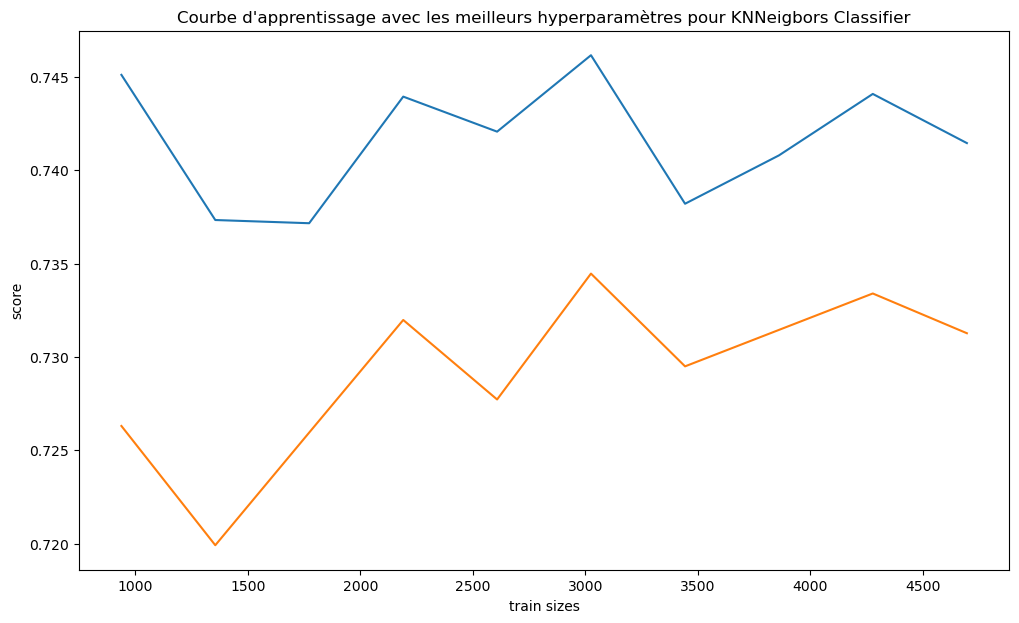

In [91]:
n, train_score, val_score = learning_curve(neigbors, 
                                           X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10), cv = stratified_kfold)

plt.subplots(1, figsize=(12, 7))
plt.plot(n, train_score.mean(axis = 1), label = 'train - Learning curve')
plt.plot(n, val_score.mean(axis = 1), label = 'validation- Learning curve')
plt.xlabel('train sizes')
plt.ylabel('score')
plt.title("Courbe d'apprentissage avec les meilleurs hyperparamètres pour KNNeigbors Classifier");